In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crime-cast-forecasting-crime-categories/sample.csv
/kaggle/input/crime-cast-forecasting-crime-categories/train.csv
/kaggle/input/crime-cast-forecasting-crime-categories/test.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
train = pd.read_csv('/kaggle/input/crime-cast-forecasting-crime-categories/train.csv')
test = pd.read_csv('/kaggle/input/crime-cast-forecasting-crime-categories/test.csv')

In [3]:
train.head()


,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description,Crime_Category
0,4500 CARPENTER AV,NaN,34.1522,-118.3910,03/09/2020 12:00:00 AM,03/06/2020 12:00:00 AM,1800.0,15.0,N Hollywood,1563.0,...,75.0,M,W,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
1,45TH ST,ALAMEDA ST,34.0028,-118.2391,02/27/2020 12:00:00 AM,02/27/2020 12:00:00 AM,1345.0,13.0,Newton,1367.0,...,41.0,M,H,216.0,SWAP MEET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes
2,600 E MARTIN LUTHER KING JR BL,NaN,34.0111,-118.2653,08/21/2020 12:00:00 AM,08/21/2020 12:00:00 AM,605.0,13.0,Newton,1343.0,...,67.0,M,B,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,Property Crimes
3,14900 ORO GRANDE ST,NaN,34.2953,-118.4590,11/08/2020 12:00:00 AM,11/06/2020 12:00:00 AM,1800.0,19.0,Mission,1924.0,...,61.0,M,H,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
4,7100 S VERMONT AV,NaN,33.9787,-118.2918,02/25/2020 12:00:00 AM,02/25/2020 12:00:00 AM,1130.0,12.0,77th Street,1245.0,...,0.0,X,X,401.0,MINI-MART,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes


In [4]:
test.head()

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Modus_Operandi,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description
0,1500 LEIGHTON AV,NaN,34.0128,-118.3045,03/03/2020 12:00:00 AM,03/03/2020 12:00:00 AM,2000.0,3.0,Southwest,376.0,...,0416 1241 1243 1813 1821 2000,28.0,F,H,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont
1,100 S NORMANDIE AV,NaN,34.0726,-118.3029,06/01/2020 12:00:00 AM,04/25/2020 12:00:00 AM,1700.0,20.0,Olympic,2014.0,...,0344 0394,26.0,M,B,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont
2,300 E 111TH ST,NaN,33.9348,-118.2695,08/28/2020 12:00:00 AM,08/27/2020 12:00:00 AM,900.0,18.0,Southeast,1844.0,...,1822 0701 1914 0355 1202 0100,62.0,F,B,721.0,HIGH SCHOOL,NaN,NaN,IC,Invest Cont
3,1300 S LA BREA AV,NaN,34.0497,-118.3442,12/23/2020 12:00:00 AM,12/03/2020 12:00:00 AM,2200.0,7.0,Wilshire,765.0,...,NaN,0.0,NaN,NaN,108.0,PARKING LOT,NaN,NaN,IC,Invest Cont
4,11000 MORRISON ST,NaN,34.1611,-118.3704,08/30/2020 12:00:00 AM,08/29/2020 12:00:00 AM,130.0,15.0,N Hollywood,1555.0,...,1501,37.0,F,W,501.0,SINGLE FAMILY DWELLING,NaN,NaN,AO,Adult Other


In [5]:
print(f'Train data dimensions = {train.shape}')

# checking for the null values
print(f'Null values in train data \n{train.isna().sum()}')

Train data dimensions = (20000, 22)
Null values in train data 
Location                     0
Cross_Street             16552
Latitude                     0
Longitude                    0
Date_Reported                0
Date_Occurred                0
Time_Occurred                0
Area_ID                      0
Area_Name                    0
Reporting_District_no        0
Part 1-2                     0
Modus_Operandi            2741
Victim_Age                   0
Victim_Sex                2624
Victim_Descent            2624
Premise_Code                 0
Premise_Description          5
Weapon_Used_Code         12665
Weapon_Description       12665
Status                       0
Status_Description           0
Crime_Category               0
dtype: int64


In [6]:
print(f'Test data dimensions = {test.shape}')

# checking for the null values
print(f'\nNull values in test data \n{test.isna().sum()}')

Test data dimensions = (5000, 21)

Null values in test data 
Location                    0
Cross_Street             4190
Latitude                    0
Longitude                   0
Date_Reported               0
Date_Occurred               0
Time_Occurred               0
Area_ID                     0
Area_Name                   0
Reporting_District_no       0
Part 1-2                    0
Modus_Operandi            684
Victim_Age                  0
Victim_Sex                643
Victim_Descent            643
Premise_Code                0
Premise_Description         1
Weapon_Used_Code         3153
Weapon_Description       3153
Status                      0
Status_Description          0
dtype: int64


**Univariate Data Analysis**

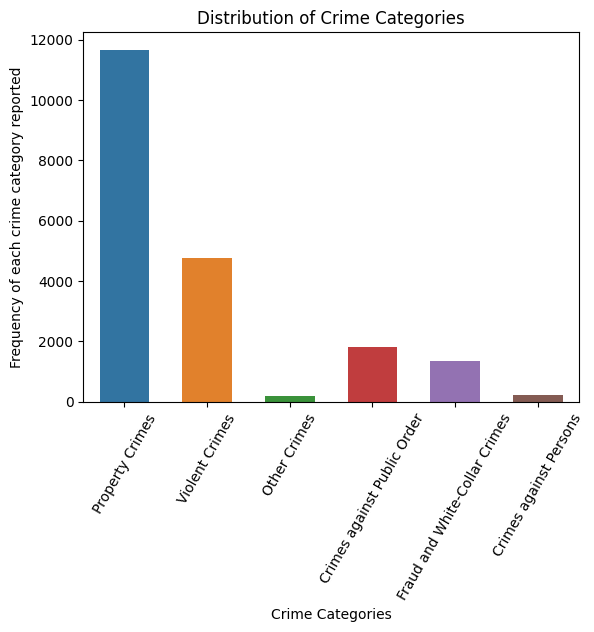

In [7]:
# count plot on Crime Cateory
sns.countplot(data=train, x=train['Crime_Category'],width=0.6)
plt.xticks(rotation=60)
plt.title('Distribution of Crime Categories')
plt.xlabel('Crime Categories')
plt.ylabel('Frequency of each crime category reported')
plt.show()

The above CountPlot shows that most of the crimes reported were **property crimes** followed by **violent crime**

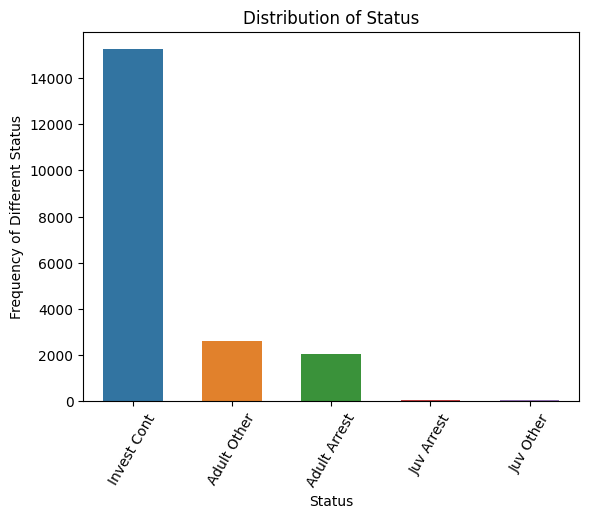

In [8]:
#Countplot for Status Description
sns.countplot(data=train, x=train['Status_Description'],width=0.6)
plt.xticks(rotation=60)
plt.title('Distribution of Status')
plt.xlabel('Status')
plt.ylabel('Frequency of Different Status')
plt.show()

CountPlot shows that most of reported crimes are under investigation stage

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


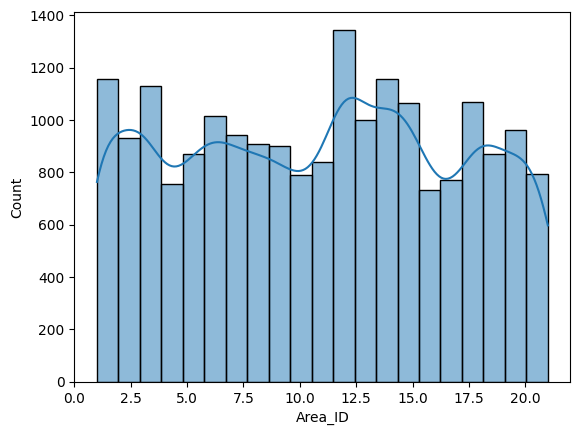

In [9]:
# Histogram for Area feature
# print(train['Area_ID'].value_counts())
sns.histplot(data=train, x='Area_ID',bins=21,kde=True)
plt.show()

The above Histogram shows the distribution of which area has most of the crimes reported. Area ID with **12** has the most number of crimes reported.

In [10]:
# dropping the "CROSS STREET" column as it has more than 80% null values
'''dropping the redundant columns
Area_Name
Premise_Description
Wepon_Used_Code
Status Description
Location'''


new_train = train.drop(['Cross_Street','Area_Name','Premise_Description',
                        'Weapon_Description','Location','Status_Description'], axis = 1)

new_test = test.drop(['Cross_Street','Area_Name','Premise_Description',
                        'Weapon_Description','Location','Status_Description'], axis = 1)

In [11]:
# Extaracting the date and month crime reported and crime occurred
new_train['Date_Occurred'] = pd.to_datetime(new_train['Date_Occurred'], 
                                            format="%m/%d/%Y %I:%M:%S %p")
new_train['Day_Occured']=new_train['Date_Occurred'].dt.day
new_train['Month_Occured']=new_train['Date_Occurred'].dt.month
new_train['Date_Reported'] = pd.to_datetime(new_train['Date_Reported'], 
                                            format="%m/%d/%Y %I:%M:%S %p")
new_train['Day_Reported']=new_train['Date_Reported'].dt.day
new_train.head()

,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Modus_Operandi,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Weapon_Used_Code,Status,Crime_Category,Day_Occured,Month_Occured,Day_Reported
0,34.1522,-118.3910,2020-03-09,2020-03-06,1800.0,15.0,1563.0,1.0,0385,75.0,M,W,101.0,NaN,IC,Property Crimes,6,3,9
1,34.0028,-118.2391,2020-02-27,2020-02-27,1345.0,13.0,1367.0,1.0,0906 0352 0371 0446 1822 0344 0416 0417,41.0,M,H,216.0,400.0,IC,Property Crimes,27,2,27
2,34.0111,-118.2653,2020-08-21,2020-08-21,605.0,13.0,1343.0,2.0,0329 1202,67.0,M,B,501.0,NaN,IC,Property Crimes,21,8,21
3,34.2953,-118.4590,2020-11-08,2020-11-06,1800.0,19.0,1924.0,1.0,0329 1300,61.0,M,H,101.0,NaN,IC,Property Crimes,6,11,8
4,33.9787,-118.2918,2020-02-25,2020-02-25,1130.0,12.0,1245.0,1.0,0416 0945 1822 0400 0417 0344,0.0,X,X,401.0,400.0,IC,Property Crimes,25,2,25


In [12]:
new_test['Date_Occurred'] = pd.to_datetime(new_test['Date_Occurred'], 
                                           format="%m/%d/%Y %I:%M:%S %p")
new_test['Day_Occured']=new_test['Date_Occurred'].dt.day
new_test['Month_Occured']=new_test['Date_Occurred'].dt.month
new_test['Date_Reported'] = pd.to_datetime(new_test['Date_Reported'], 
                                           format="%m/%d/%Y %I:%M:%S %p")
new_test['Day_Reported']=new_test['Date_Reported'].dt.day
new_test.head()

,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Modus_Operandi,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Weapon_Used_Code,Status,Day_Occured,Month_Occured,Day_Reported
0,34.0128,-118.3045,2020-03-03,2020-03-03,2000.0,3.0,376.0,2.0,0416 1241 1243 1813 1821 2000,28.0,F,H,501.0,400.0,IC,3,3,3
1,34.0726,-118.3029,2020-06-01,2020-04-25,1700.0,20.0,2014.0,1.0,0344 0394,26.0,M,B,502.0,NaN,IC,25,4,1
2,33.9348,-118.2695,2020-08-28,2020-08-27,900.0,18.0,1844.0,2.0,1822 0701 1914 0355 1202 0100,62.0,F,B,721.0,NaN,IC,27,8,28
3,34.0497,-118.3442,2020-12-23,2020-12-03,2200.0,7.0,765.0,1.0,NaN,0.0,NaN,NaN,108.0,NaN,IC,3,12,23
4,34.1611,-118.3704,2020-08-30,2020-08-29,130.0,15.0,1555.0,2.0,1501,37.0,F,W,501.0,NaN,AO,29,8,30


In [13]:
# removing the date_reported and date_occured columns
new_train = new_train.drop(['Date_Occurred','Date_Reported'], axis = 1)
new_test = new_test.drop(['Date_Occurred','Date_Reported'], axis = 1)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


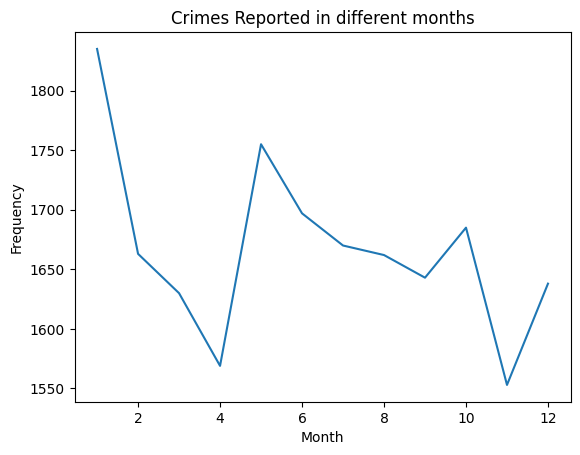

In [14]:
# line plot to show trend in number of crimes occurred 
crime_month=pd.DataFrame(new_train['Month_Occured'].value_counts())
sns.lineplot(data=crime_month, x='Month_Occured',y='count')
plt.title('Crimes Reported in different months')
plt.ylabel('Frequency')
plt.xlabel('Month')
plt.show()
# crime_month.head()

Line Plot depicts the trend in the number of crimes occurred in a particular month. The **highest number of crimes** reported were during the month of **January**.

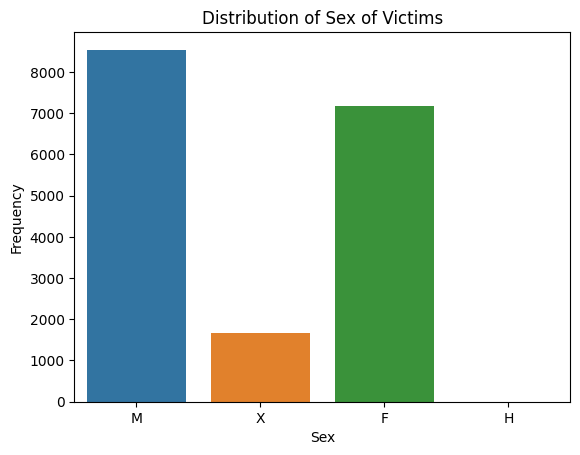

In [15]:
# countplot for showing the distribution of Victims' sex
sns.countplot(data=new_train, x='Victim_Sex')
plt.title('Distribution of Sex of Victims')
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.show()

Most of the victims of crimes are either Male or Female. Very few victims were belonged to **Homosexual** sex.

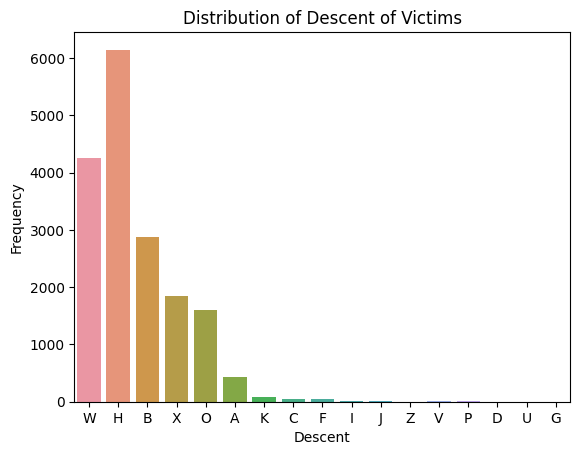

In [16]:
# countplot for showing the distribution of Victims' descent
sns.countplot(data=new_train, x='Victim_Descent')
plt.title('Distribution of Descent of Victims')
plt.xlabel('Descent')
plt.ylabel('Frequency')
plt.show()

In [17]:
# imputing the null values of the dataset
new_train['Modus_Operandi'] = new_train['Modus_Operandi'].replace(np.nan, value = "")
new_train['Victim_Sex'] = new_train['Victim_Sex'].replace(np.nan,value=train['Victim_Sex'].mode()[0])
new_train['Victim_Descent'] = new_train['Victim_Descent'].replace(np.nan,value=train['Victim_Descent'].mode()[0])
new_train['Weapon_Used_Code']=new_train['Weapon_Used_Code'].replace(np.nan, value=new_train['Weapon_Used_Code'].mode()[0])
new_train.isna().sum()

Latitude                 0
Longitude                0
Time_Occurred            0
Area_ID                  0
Reporting_District_no    0
Part 1-2                 0
Modus_Operandi           0
Victim_Age               0
Victim_Sex               0
Victim_Descent           0
Premise_Code             0
Weapon_Used_Code         0
Status                   0
Crime_Category           0
Day_Occured              0
Month_Occured            0
Day_Reported             0
dtype: int64

In [18]:
new_test['Modus_Operandi'] = new_test['Modus_Operandi'].replace(np.nan, value = "")
new_test['Victim_Sex'] = new_test['Victim_Sex'].replace(np.nan,value=test['Victim_Sex'].mode()[0])
new_test['Victim_Descent'] = new_test['Victim_Descent'].replace(np.nan,value=test['Victim_Descent'].mode()[0])
new_test['Weapon_Used_Code']=new_test['Weapon_Used_Code'].replace(np.nan, value=new_test['Weapon_Used_Code'].mode()[0])
new_test.isna().sum()

Latitude                 0
Longitude                0
Time_Occurred            0
Area_ID                  0
Reporting_District_no    0
Part 1-2                 0
Modus_Operandi           0
Victim_Age               0
Victim_Sex               0
Victim_Descent           0
Premise_Code             0
Weapon_Used_Code         0
Status                   0
Day_Occured              0
Month_Occured            0
Day_Reported             0
dtype: int64

In [19]:
print(new_train.shape)
print(new_test.shape)

(20000, 17)
(5000, 16)


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


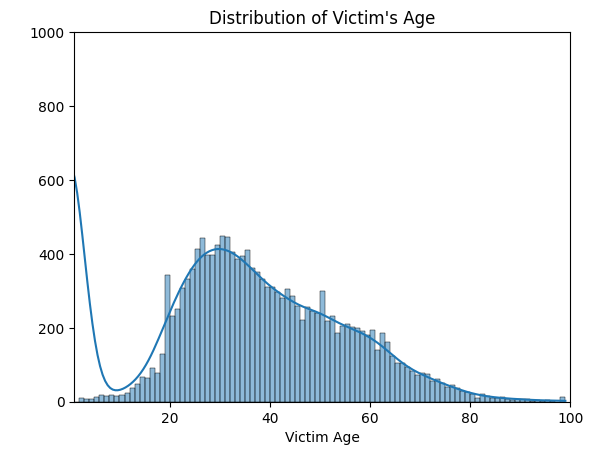

In [20]:
sns.histplot(data=new_train, x='Victim_Age',bins=30,binwidth=1,kde=True)
plt.xlim(1,100)
plt.ylim(0,1000)
plt.xlabel('Victim Age')
plt.ylabel(' ')
plt.title("Distribution of Victim's Age")
plt.show()

Most of the victims of the crimes were from the age group 20 to 40.

**Bivariate Feature Analysis**

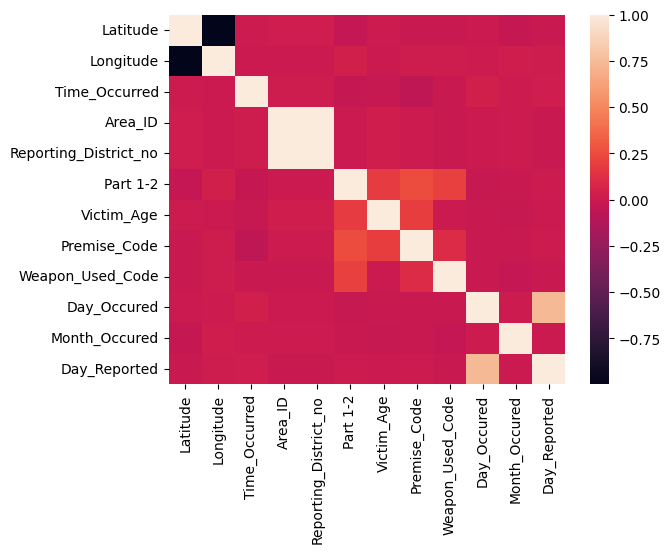

In [21]:
# correlation heatmap of all the numerical features
num_columns=new_train.select_dtypes(include=['int32','int64','float64']).columns.tolist()
num_data=pd.concat([new_train[num_columns],new_train['Crime_Category']],axis=1)

sns.heatmap(num_data.iloc[:, :-1].corr(),fmt=".3g")
plt.show()

From the correlation heatmap, it is evident that most of the features are not correlated to each other. This means that change in a particular feature doesn't affect other feature. Except that there is very strong negative correlation between latitude and longitude..

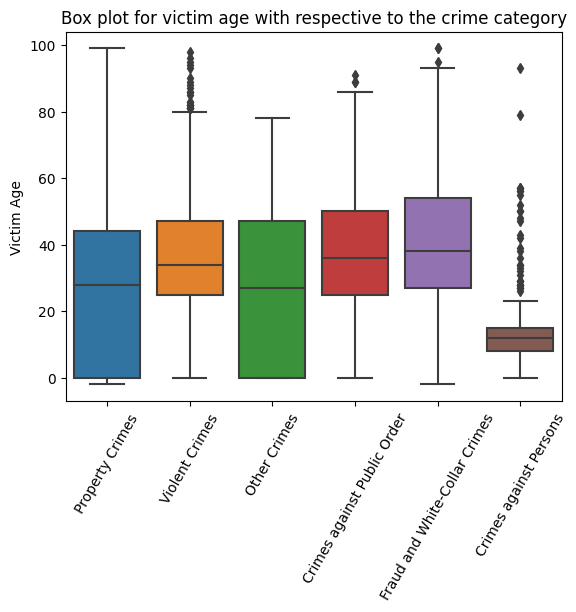

In [22]:
# box plot for visualizing median age of victim with respect the type of crime
sns.boxplot(data=num_data, y= 'Victim_Age',x='Crime_Category')
plt.xticks(rotation=60)
plt.title('Box plot for victim age with respective to the crime category')
plt.ylabel('Victim Age')
plt.xlabel('')
plt.show()

* The median age of victims of property crimes is 30. 
* Vicitms of violent crimes are mostly from the age group 30 to 50
* Fraud and White-collar crimes were reported by people who are working, and generally their age is between 30 to 55.

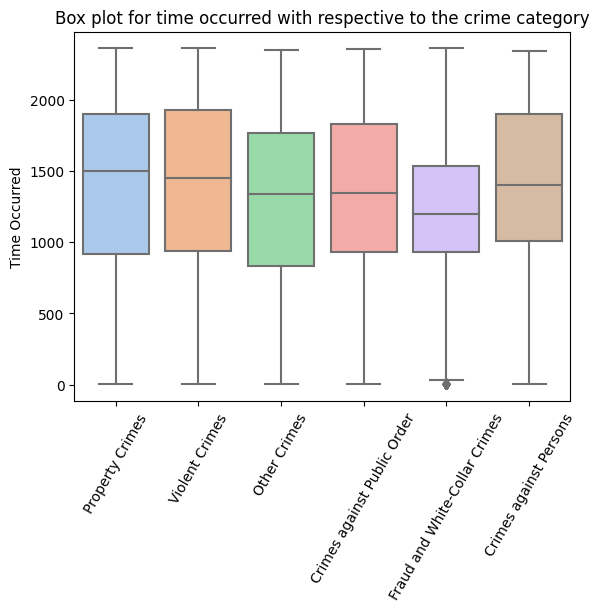

In [23]:
# box plot for visualizing median time of crime occurred with respect the type of crime
sns.boxplot(data=num_data, y= 'Time_Occurred',x='Crime_Category',palette="pastel")
plt.xticks(rotation=60)
plt.title('Box plot for time occurred with respective to the crime category')
plt.ylabel('Time Occurred')
plt.xlabel('')
plt.show()

* Most of Property Crimes occurred between morning 9am and evening 8pm.
* Most of Violent Crimes also occurred between morning 9am and evening 8pm.
* White-Collar crimes and fraud took place during the general working hours of employees i.e., morning 10am to evening 6pm.

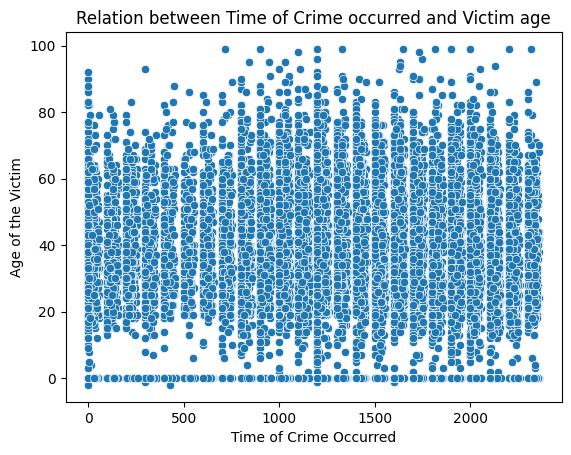

In [24]:
# Scatter plot to map the relation between Time of Crime occurred and Victim's age
sns.scatterplot(num_data,x='Time_Occurred',y='Victim_Age')
plt.xlabel('Time of Crime Occurred')
plt.ylabel('Age of the Victim')
plt.title('Relation between Time of Crime occurred and Victim age')
plt.show()

The Scatter plot shows that there is no correlation between the time of crime occurred and age of the vicitms.

In [25]:
# use the tfidf vectorizer for Modus_Operandi Data of training data
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
train_data = tfidf.fit_transform(new_train['Modus_Operandi'])
train_data = train_data.toarray()

# Performing Dimensionality Recduction using PCA

from sklearn.decomposition import PCA
pca = PCA(n_components = 300)
pca_train = pca.fit_transform(train_data)

pca_feature_names=[f'MO_{i}'for i in range(300)]
train_MO = pd.DataFrame(pca_train,columns=pca_feature_names)
new_train = pd.concat([new_train, train_MO], axis=1)

# Drop the original Modus_Operandi column as the column is vectorized
new_train = new_train.drop(['Modus_Operandi'], axis=1)

print(new_train.shape)
new_train.head()

(20000, 316)


,Latitude,Longitude,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,...,MO_290,MO_291,MO_292,MO_293,MO_294,MO_295,MO_296,MO_297,MO_298,MO_299
0,34.1522,-118.3910,1800.0,15.0,1563.0,1.0,75.0,M,W,101.0,...,-0.000032,0.000091,0.000077,0.000019,0.000129,-0.000055,0.000087,0.000049,0.000153,-0.000057
1,34.0028,-118.2391,1345.0,13.0,1367.0,1.0,41.0,M,H,216.0,...,0.001610,-0.001439,-0.001452,0.001657,-0.001763,-0.001642,-0.000493,-0.003073,0.000758,0.001077
2,34.0111,-118.2653,605.0,13.0,1343.0,2.0,67.0,M,B,501.0,...,0.000405,-0.000200,0.000205,-0.000455,-0.000703,-0.000058,-0.000310,-0.000014,0.000185,-0.000055
3,34.2953,-118.4590,1800.0,19.0,1924.0,1.0,61.0,M,H,101.0,...,-0.000275,0.000056,0.000088,0.000053,-0.000007,-0.000104,0.000043,0.000140,0.000058,0.000094
4,33.9787,-118.2918,1130.0,12.0,1245.0,1.0,0.0,X,X,401.0,...,-0.000185,0.000421,-0.000826,-0.000407,0.000759,-0.000644,0.000968,0.000099,0.000040,0.000318


In [26]:
# use the tfidf vectorizer for Modus_Operandi Data of test data
test_data = tfidf.transform(new_test['Modus_Operandi'])
test_data = test_data.toarray()

pca_test = pca.transform(test_data)
test_MO= pd.DataFrame(pca_test,columns=pca_feature_names)
new_test = pd.concat([new_test, test_MO], axis=1)

# Drop the original Modus_Operandi column as the column is vectorized
new_test = new_test.drop(['Modus_Operandi'], axis=1)

print(new_test.shape)
new_test.head()

(5000, 315)


,Latitude,Longitude,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,...,MO_290,MO_291,MO_292,MO_293,MO_294,MO_295,MO_296,MO_297,MO_298,MO_299
0,34.0128,-118.3045,2000.0,3.0,376.0,2.0,28.0,F,H,501.0,...,0.000166,-0.000276,0.000195,0.000591,-0.000103,-0.000288,0.000108,-0.000034,0.000242,-0.000114
1,34.0726,-118.3029,1700.0,20.0,2014.0,1.0,26.0,M,B,502.0,...,0.000007,0.000015,0.000023,-0.000102,0.000056,0.000013,0.000019,0.000042,-0.000068,0.000073
2,33.9348,-118.2695,900.0,18.0,1844.0,2.0,62.0,F,B,721.0,...,-0.011504,-0.001652,0.006455,0.001447,0.000046,-0.000645,0.004246,0.003562,-0.012533,0.004083
3,34.0497,-118.3442,2200.0,7.0,765.0,1.0,0.0,M,H,108.0,...,-0.000036,-0.000053,-0.000393,-0.000073,-0.000007,-0.000125,-0.000099,0.000060,0.000178,-0.000140
4,34.1611,-118.3704,130.0,15.0,1555.0,2.0,37.0,F,W,501.0,...,0.000030,-0.000429,-0.000279,-0.000247,0.000041,0.000062,0.000064,-0.000480,-0.000323,-0.000191


In [27]:
# Encoding the Categorical features of the dataset.
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

new_train['Victim_Sex'] = le.fit_transform(new_train['Victim_Sex'])
new_train['Victim_Descent'] = le.fit_transform(new_train['Victim_Descent'])
new_train['Status']=le.fit_transform(new_train['Status'])

In [28]:
encode = LabelEncoder()
new_test['Victim_Sex']=encode.fit_transform(new_test['Victim_Sex'])
new_test['Victim_Descent']=encode.fit_transform(new_test['Victim_Descent'])
new_test['Status']=encode.fit_transform(new_test['Status'])

In [29]:
print(new_train.shape)
print(new_test.shape)

(20000, 316)
(5000, 315)


In [30]:
# splitting the dataset into training and testing set
from sklearn.model_selection import train_test_split
target = new_train['Crime_Category']
attributes = new_train.drop(['Crime_Category'],axis = 1)

#scaling the attributes 
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
attributes = ss.fit_transform(attributes)
validate_data = ss.fit_transform(new_test)
x_train, x_test, y_train,y_test= train_test_split(attributes, target, 
                                                  test_size=0.2, random_state=100)

0.93825


<Axes: >

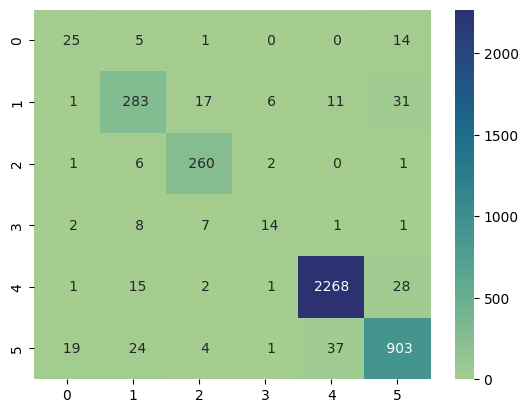

In [31]:
# 1) Performing Logistic Regression
from sklearn.linear_model import LogisticRegression
lor=LogisticRegression(penalty='l2',tol=0.0001,solver='lbfgs',max_iter=500,
                       multi_class='multinomial',random_state=100)

lor.fit(x_train, y_train)
y_pred_lor= lor.predict(x_test)
from sklearn.metrics import accuracy_score, confusion_matrix
rfc_accuracy = accuracy_score(y_test, y_pred_lor)
print(rfc_accuracy)
sns.heatmap(confusion_matrix(y_test, y_pred_lor), annot=True, fmt='4',cmap='crest')

In [32]:
# making the predictions on the validation set
validate_predictions = lor.predict(validate_data)
submission=pd.DataFrame(columns=['ID','Crime_Category'])
submission['ID']=[i for i in range(1,len(validate_predictions)+1)]
submission['Crime_Category']=validate_predictions
submission.to_csv('/kaggle/working/submission.csv',index=False)

In [33]:
submission.head()

,ID,Crime_Category
0,1,Violent Crimes
1,2,Property Crimes
2,3,Fraud and White-Collar Crimes
3,4,Property Crimes
4,5,Crimes against Public Order


In [34]:
# 2) Performing Random Forest Classifier
# from sklearn.ensemble import RandomForestClassifier
# rfc = RandomForestClassifier(n_estimators=300, criterion='entropy',min_samples_split=4,
#                              min_samples_leaf=2,max_features='log2')
# rfc.fit(x_train, y_train)
# y_pred= rfc.predict(x_test)
# from sklearn.metrics import accuracy_score, confusion_matrix
# rfc_accuracy = accuracy_score(y_test, y_pred)
# print(rfc_accuracy)
# confusion_matrix(y_test, y_pred)

# #Accuracy was 0.91340#

In [35]:
# 3) Performing SVM with cross validation using GridSearchCV

# from sklearn.model_selection import GridSearchCV
# parameter={"C":[1,2,3],"tol":[0.0002,0.005],
#           "kernel":['rbf','poly','sigmoid'],
#           "degree":[3,4]}
# gcv_svm=GridSearchCV(estimator=svc,param_grid=parameter, cv=3)
# gcv_svm.fit(x_train,y_train)
# y_pred_cv=gcv_svm.predict(x_test)
# gcv_scm_score=accuracy_score(y_test,y_pred_cv)


# #output#
# Best hyperparameters: {'C': 3, 'degree': 3, 'kernel': 'rbf', 'tol': 0.005}
# Best cross-validation score: 0.9106250032078074

# #Accuracy Score was 0.91340#

In [36]:
# 4) Building MultiLayer Perceptron Model to the data

# from sklearn.neural_network import MLPClassifier
# mlp=MLPClassifier(hidden_layer_sizes=(200,),activation='tanh',solver='lbfgs',
#                  alpha=0.001,learning_rate='adaptive',tol=0.0005,max_iter=1000)

# mlp.fit(x_train,y_train)
# y_pred=mlp.predict(x_test)
# from sklearn.metrics import accuracy_score, confusion_matrix
# dt_accuracy = accuracy_score(y_test, y_pred)
# print(dt_accuracy)
# confusion_matrix(y_test,y_pred)

# Accuracy score was 0.90940

In [37]:
# 5) Performing SVM classifier without cross validation

# from sklearn.svm import SVC 
# svc = SVC(tol=0.005,random_state=100)
# svc.fit(x_train, y_train)
# y_pred=svc.predict(x_test)
# from sklearn.metrics import accuracy_score, confusion_matrix
# svc_accuracy=accuracy_score(y_test, y_pred)
# print(svc_accuracy)
# confusion_matrix(y_test, y_pred)

# #Accuracy score was .90540#

In [38]:
# 6) Performing KNN

# from sklearn.neighbors import KNeighborsClassifier 
# knn = KNeighborsClassifier(n_neighbors=10,algorithm='brute')
# knn.fit(x_train, y_train)
# y_pred=knn.predict(x_test)
# from sklearn.metrics import accuracy_score, confusion_matrix
# knn_accuracy=accuracy_score(y_test, y_pred)
# print(knn_accuracy)
# confusion_matrix(y_test, y_pred)

# #Accuracy Score was .86540#

In [39]:
# 7) Performing Decision Tree Classifier

# from sklearn.tree import DecisionTreeClassifier
# dt=DecisionTreeClassifier(criterion='entropy',splitter='random',min_samples_split=5,
#                         max_features='sqrt',random_state=10)
# dt.fit(x_train,y_train)
# y_pred=dt.predict(x_test)
# from sklearn.metrics import accuracy_score, confusion_matrix
# dt_accuracy = accuracy_score(y_test, y_pred)
# print(dt_accuracy)
# confusion_matrix(y_test,y_pred)

# #Accuracy score was 0.86200#

In [40]:
# 8) Performing Bagging Classifier with estimator being RandomForestClassifier

# from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
# bcc = BaggingClassifier(estimator=RandomForestClassifier(),n_estimators=30,bootstrap=True,
#                              max_features=10,random_state=100)
# bcc.fit(x_train, y_train)
# y_pred= bcc.predict(x_test)
# from sklearn.metrics import accuracy_score, confusion_matrix
# bcc_accuracy = accuracy_score(y_test, y_pred)
# print(bcc_accuracy)
# confusion_matrix(y_test, y_pred)

# #Accuracy score was 0.85560#